# INFOSYS STOCK PREDICTION

### Done by Sweta Jha(170710007057)      

In [1]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Visualising

In [2]:
#reading the data from "datasets_423609_1456925_INFY" file
data = pd.read_csv('datasets_423609_1456925_INFY.csv')
print('From Top\n')
data.head()

From Top



,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
1,2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2,2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
3,2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
4,2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN


In [4]:
print('From Bottom\n')
data.tail()

From Bottom



,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5136,2020-08-25,INFY,EQ,947.40,947.50,948.65,933.60,938.60,938.10,940.65,6233923,5.863928e+14,105761.0,3116528.0,0.4999
5137,2020-08-26,INFY,EQ,938.10,941.25,954.25,938.40,953.50,950.80,945.03,5153663,4.870350e+14,114894.0,2282594.0,0.4429
5138,2020-08-27,INFY,EQ,950.80,960.00,960.95,945.20,950.80,947.05,952.03,6154300,5.859108e+14,124639.0,2632139.0,0.4277
5139,2020-08-28,INFY,EQ,947.05,951.45,952.50,933.05,935.05,935.25,940.50,7593988,7.142135e+14,180829.0,4654594.0,0.6129
5140,2020-08-31,INFY,EQ,935.25,935.25,950.50,914.60,919.70,928.60,933.36,12808369,1.195481e+15,206060.0,6793301.0,0.5304


# Training and Testing(75% - 25%) 

In [5]:
data_training = data[data['Date']<'2015-01-01'].copy()#dividing training set
data_testing = data[data['Date']>='2015-01-01'].copy()#dividing testing set

data_training

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
1,2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2,2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
3,2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
4,2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,2014-12-24,INFY,EQ,1971.65,1976.00,1987.00,1915.05,1932.00,1930.55,1937.83,6834872,1.324484e+15,71870.0,5381741.0,0.7874
3736,2014-12-26,INFY,EQ,1930.55,1945.10,1960.70,1930.95,1951.90,1952.25,1946.36,567187,1.103950e+14,28049.0,235021.0,0.4144
3737,2014-12-29,INFY,EQ,1952.25,1956.05,1972.80,1952.50,1960.95,1957.80,1959.90,698169,1.368341e+14,33995.0,385864.0,0.5527
3738,2014-12-30,INFY,EQ,1957.80,1962.25,1975.00,1956.80,1966.90,1966.35,1966.45,1160138,2.281359e+14,59166.0,827058.0,0.7129


In [6]:
training_data = data_training.drop(['Date','Symbol','Series','Prev Close','Last','VWAP','Turnover','Trades','Deliverable Volume','%Deliverble'],axis=1)
training_data.head()                                  

,Open,High,Low,Close,Volume
0,15625.00,15625.20,15625.00,15625.20,5137
1,16800.00,16875.25,16253.00,16855.90,56186
2,15701.00,16250.00,15507.45,15507.45,164605
3,15256.65,15300.00,14266.85,14266.85,81997
4,13125.50,13125.50,13125.50,13125.50,7589


In [7]:
Scaler = MinMaxScaler()#scaling the values
training_data = Scaler.fit_transform(training_data)
training_data

array([[9.25144932e-01, 9.20660208e-01, 9.58719516e-01, 9.21878174e-01,
        4.43997497e-05],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.27222360e-03],
       [9.29986622e-01, 9.60315823e-01, 9.50992572e-01, 9.14403692e-01,
        3.87990315e-03],
       ...,
       [5.43447793e-02, 5.41520026e-02, 5.99815947e-02, 5.43050477e-02,
        1.67131144e-02],
       [5.47397592e-02, 5.42916351e-02, 6.02642477e-02, 5.48477808e-02,
        2.78243322e-02],
       [5.42778875e-02, 5.45423388e-02, 5.98172616e-02, 5.52413417e-02,
        4.18240591e-02]])

In [8]:
x_train = []
y_train = []
training_data.shape[0]

3740

In [9]:
for i in range(30,training_data.shape[0]):
    x_train.append(training_data[i-30:i])
    y_train.append(training_data[i,0])

In [10]:
x_train,y_train = np.array(x_train),np.array(y_train)
x_train.shape

(3710, 30, 5)

# Building LSTM

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout #importing layers

In [51]:
regressior = Sequential()

regressior.add(LSTM(units=60,activation='relu',return_sequences = True, input_shape=(x_train.shape[1],5)))
regressior.add(Dropout(0.05))

regressior.add(LSTM(units=60,activation='relu',return_sequences = True))
regressior.add(Dropout(0.05))

regressior.add(LSTM(units=80,activation='relu',return_sequences = True))
regressior.add(Dropout(0.05))

regressior.add(LSTM(units=120,activation='relu'))
regressior.add(Dropout(0.05))

regressior.add(Dense(units=1))

regressior.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 30, 60)            15840     
_________________________________________________________________
dropout_12 (Dropout)         (None, 30, 60)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 30, 60)            29040     
_________________________________________________________________
dropout_13 (Dropout)         (None, 30, 60)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 30, 80)            45120     
_________________________________________________________________
dropout_14 (Dropout)         (None, 30, 80)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 120)              

# Model is ready

In [52]:
regressior.compile(optimizer='adam',loss='mean_squared_error')
regressior.fit(x_train,y_train,epochs=50,batch_size=32)

Train on 3710 samples
Epoch 1/50
3710/3710 [==============================] - 8s 2ms/sample - loss: 0.0026
Epoch 2/50
3710/3710 [==============================] - 5s 1ms/sample - loss: 7.9491e-04
Epoch 3/50
3710/3710 [==============================] - 5s 1ms/sample - loss: 7.7327e-04
Epoch 4/50
3710/3710 [==============================] - 5s 1ms/sample - loss: 6.8571e-04
Epoch 5/50
3710/3710 [==============================] - 5s 1ms/sample - loss: 6.0049e-04
Epoch 6/50
3710/3710 [==============================] - 5s 1ms/sample - loss: 5.9141e-04
Epoch 7/50
3710/3710 [==============================] - 5s 1ms/sample - loss: 5.8974e-04
Epoch 8/50
3710/3710 [==============================] - 5s 1ms/sample - loss: 4.1963e-04
Epoch 9/50
3710/3710 [==============================] - 5s 1ms/sample - loss: 3.5781e-04
Epoch 10/50
3710/3710 [==============================] - 5s 1ms/sample - loss: 3.6313e-04
Epoch 11/50
3710/3710 [==============================] - 5s 1ms/sample - loss: 3.6451e-04
E

# Training Done on Training set

# Preparing Test dataset

In [53]:
past_30_days = data_training.tail(30)
df = past_30_days.append(data_testing,ignore_index=True)
df = df.drop(['Date','Symbol','Series','Prev Close','Last','VWAP','Turnover','Trades','Deliverable Volume','%Deliverble'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,4180.0,4189.95,4139.75,4173.35,650140
1,4190.0,4232.50,4183.85,4225.60,668491
2,4170.0,4179.00,4101.60,4146.15,1307909
3,4200.0,4281.65,4191.95,4275.10,1380930
4,4295.0,4319.95,4246.00,4303.20,1860822


In [54]:
inputs = Scaler.transform(df)
inputs

array([[ 0.19602472,  0.19487295,  0.20375666,  0.19494274,  0.01555793],
       [ 0.19666178,  0.19757357,  0.20665549,  0.19825945,  0.0159993 ],
       [ 0.19538765,  0.19417796,  0.20124893,  0.19321615,  0.0313785 ],
       ...,
       [-0.00911002, -0.0100694 , -0.00623151, -0.00985489,  0.14794326],
       [-0.00965471, -0.01060572, -0.00703017, -0.01060393,  0.18257045],
       [-0.01068676, -0.01073266, -0.00824295, -0.01102605,  0.30798606]])

In [55]:
x_test = []
y_test = []

inputs.shape[0]

1431

In [56]:
for i in range(30,inputs.shape[0]):
    x_test.append(inputs[i-30:i])
    y_test.append(inputs[i,0])

In [57]:
x_test,y_test = np.array(x_test),np.array(y_test)
x_test.shape, y_test.shape

((1401, 30, 5), (1401,))

In [58]:
y_pred = regressior.predict(x_test)

In [59]:
y_pred

array([[ 5.7105169e-02],
       [ 5.7408318e-02],
       [ 5.7688855e-02],
       ...,
       [ 4.7979504e-04],
       [ 2.5434047e-04],
       [-4.9866736e-05]], dtype=float32)

In [60]:
#inveres scaling
Scaler.scale_

array([6.37064407e-05, 6.34692951e-05, 6.57332545e-05, 6.34775543e-05,
       2.40518687e-08])

In [61]:
scale = 1/6.37064407e-05
scale

15697.000005212973

In [62]:
y_pred = y_pred*scale
y_test = y_test*scale

# Visualing the prediction with the accurate

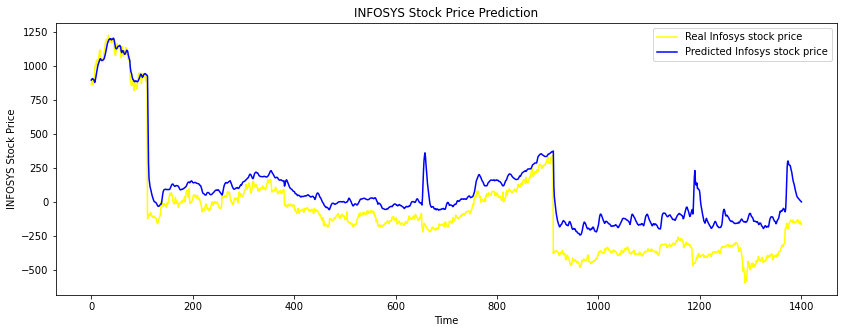

In [63]:
plt.figure(figsize=(14,5))
plt.plot(y_test,color='yellow',label='Real Infosys stock price')
plt.plot(y_pred,color='blue',label='Predicted Infosys stock price')
plt.title('INFOSYS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('INFOSYS Stock Price')
plt.legend()
plt.show()